### Intro

Saya adalah seorang data scientist di sebuah e-comerce yang fokus dalam penjualan alat kosmetik, yaitu sephora.
pada suatu hari CEO datang untuk menenyakan beberapa hal dibawah, kita dapat menjawabnya menggunakan visualisasi data sehingga mudah dipahami oleh seorang CEO.

# Task

- [x] Untuk kategori "Perfume", "Moisturizers" bagaimana distribusi untuk harganya ? apakah mahal atau murah ?
- [x] Untuk brand "SEPHORA COLLECTION" apakah banyak yang suka dengan produknya ? (jangan gunakan review 0)
- [x] Bandingkan harga antara brand "Dior" dengan "SEPHORA COLLECTION" ?
- [x] Siapa brand yang paling banyak memiliki jumlah barang ? urutkan top 5 ?
- [x] Siapa brand yang paling banyak disukai ? urutkan top 5 ?
- [x] Kategori apa yang paling banyak menyumbang penjualan dari brand "tarte" ?
- [x] Apakah ada hubungan antara harga dengan banyaknya produk yang terjual, dan banyaknya produk yang disukai ?

Untuk pengerjaan bisa melakukan modifikasi terhadap dataset terlebih dahulu, kemudian dilakukan visualisasi

# Exercise Data Visualization

Dataset can be downloaded here:
https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website/version/1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
## Getting data
df = pd.read_csv('sephora_website_dataset.csv')

In [30]:
## Checking Data
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [20]:
## Checking Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [21]:
## Checking Data
df.isna().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [27]:
## Decribe Data Object
df.describe(include = np.object)

,brand,category,name,size,URL,MarketingFlags_content,options,details,how_to_use,ingredients
count,9168,9168,9168,9168,9168,9168,9168,9168,9168,9168
unique,324,143,9106,1623,9168,10,564,8839,6497,6962
top,SEPHORA COLLECTION,Perfume,Blush,no size,https://www.sephora.com/product/pour-homme-P21...,0,no options,no details,no instructions,unknown
freq,496,665,4,3161,1,4786,8377,14,1573,1630


In [56]:
## Filtering Data for Q.1
category_mean = df[['category','price']].groupby(['category'], as_index=False).mean()
category_mean.head(5)

,category,price
0,Accessories,28.000000
1,After Sun Care,26.500000
2,Aftershave,38.192308
3,Anti-Aging,131.297297
4,BB & CC Cream,36.000000


## No.2 Untuk kategori "Perfume", "Moisturizers" bagaimana distribusi untuk harganya ? apakah mahal atau murah ?

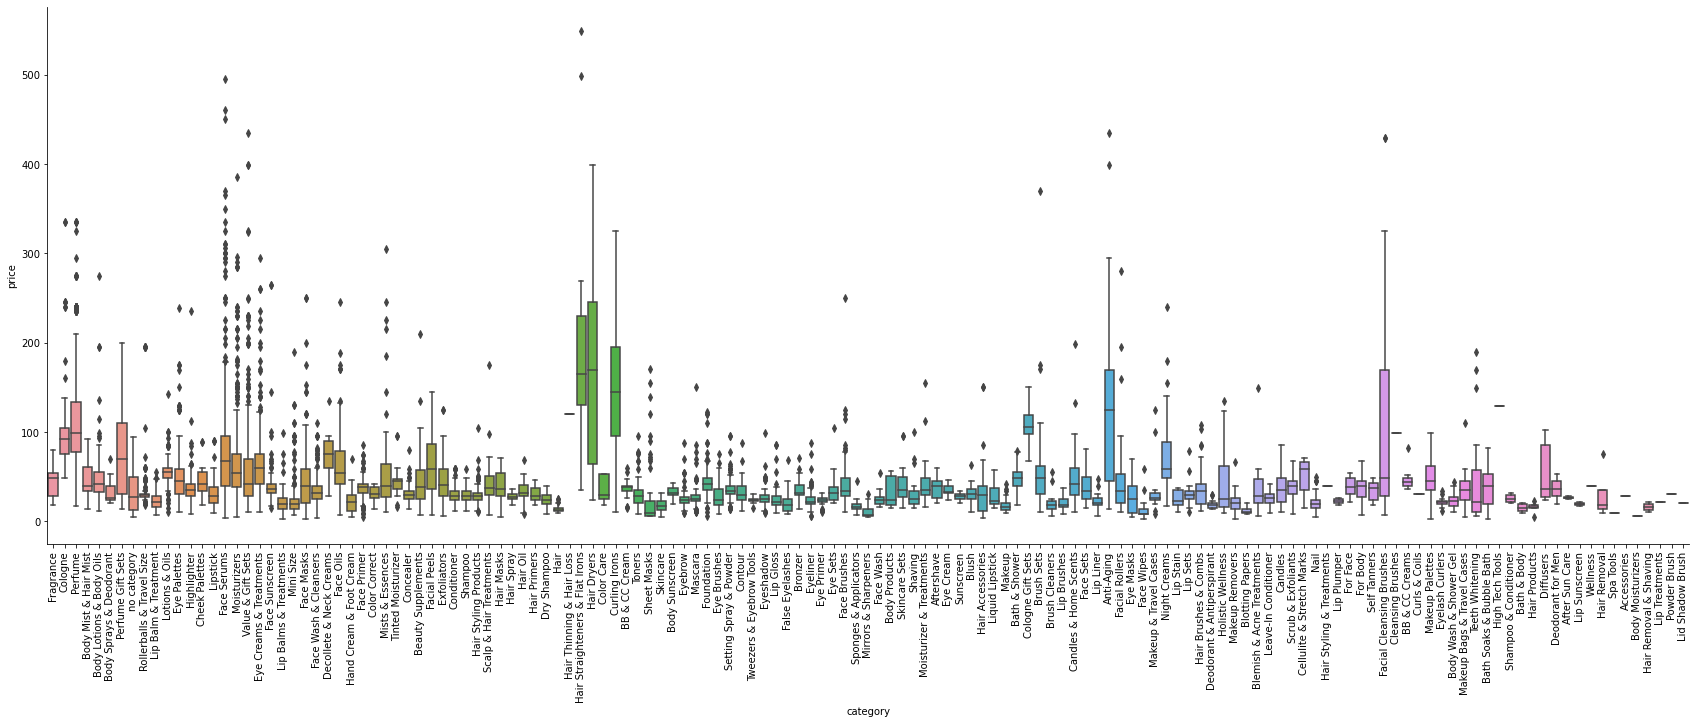

In [47]:
## Creating Histogram
data = sns.catplot(x='category', y='price',
                  data=df, kind='box',
                  height=8, aspect=3);

data.set_xticklabels(rotation=90)
plt.show(data)

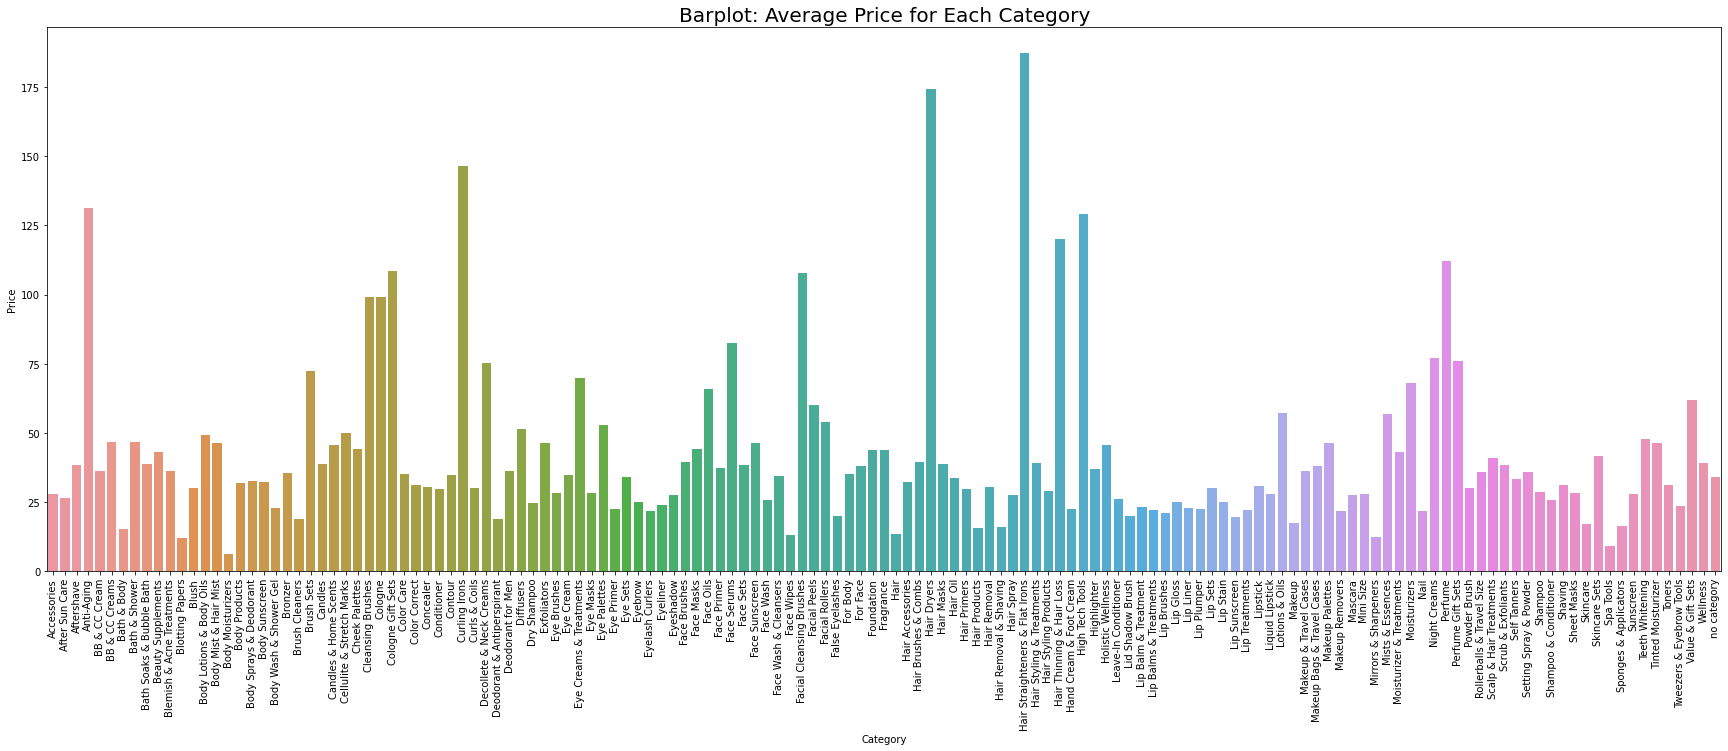

In [77]:
# Create a Bar Plot
x = category_mean['category'].unique().tolist()    #Fungsi unique pandas
y = category_mean['price']

plt.figure(figsize=(30,10))
data = sns.barplot( x='category', y='price', data=category_mean)
plt.title('Barplot: Average Price for Each Category', size=20)
plt.xlabel('Category')
plt.ylabel('Price')
data.set_xticklabels(x,rotation=90)
plt.show()

## No.3 Untuk brand "SEPHORA COLLECTION" apakah banyak yang suka dengan produknya ? (jangan gunakan review 0)

In [96]:
all = df['love'].mean()
all

16278.585078534032

In [83]:
df_sephora = df[df['brand']=='SEPHORA COLLECTION']
sephora = df_sephora[['brand','love']].groupby(['brand'], as_index=False).mean()
sephora

,brand,love
0,SEPHORA COLLECTION,17785.266129


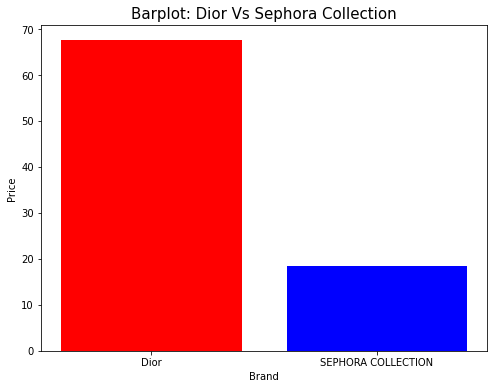

In [93]:
## Group by Brand
df_brand = df[['brand','price']].groupby(['brand'], as_index=False).mean()
dior_x_sephora = df_brand[(df_brand['brand']=='SEPHORA COLLECTION')|(df_brand['brand']=='Dior')]

## Creating BarPlot
x = dior_x_sephora['brand'].unique().tolist()    #Fungsi unique pandas
y = dior_x_sephora['price']

plt.figure(figsize=(8,6))
plt.bar(x, y, color = ['red', 'blue'])
plt.title('Barplot: Dior Vs Sephora Collection', size=15)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

## 4. Siapa brand yang paling banyak memiliki jumlah barang ? urutkan top 5 ?

In [97]:
## 4.Siapa brand yang paling banyak memiliki jumlah barang ? urutkan top 5 ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [111]:
df[['brand','name']].describe(include = np.object)

,brand,name
count,9168,9168
unique,324,9106
top,SEPHORA COLLECTION,Blush
freq,496,4


In [17]:
## Drop duplicates name
items = df.drop_duplicates(subset=['name'])
items.sample(4)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
6385,2323764,PATRICK TA,Eye Brushes,Eyeshadow Brush,no size,5.0,2,1200,22.0,22.0,...,True,exclusive · online only,no options,What it is: A fluffy shadow brush that gently ...,Suggested Usage:-To clean- gently wash with wa...,unknown,1,1,0,0
1199,2086254,By Rosie Jane,Rollerballs & Travel Size,Angie Travel Spray,0.25 oz/ 7.5 mL,4.5,5,724,25.0,25.0,...,False,0,- 0.25 oz/ 7.5 mL Eau de Parfum Travel Spray,Fragrance Family: FloralScent Type: Classic Fl...,no instructions,Organic Cane Sugar Alcohol And Distilled Water...,0,0,0,0
6354,2274314,PAT McGRATH LABS,Eye Palettes,Blitz Astral Quad Eyeshadow Palette,4 x 0.05 oz/ 1.5 g,4.5,128,29400,65.0,65.0,...,True,limited edition · exclusive,no options,What it is: A covetable collection for the ey...,Suggested Usage:\nIconic Illumination—Sublimin...,Blitz Brown:Mica- Myristyl Trisiloxane- Butyro...,0,1,1,0
4244,2127058,Kérastase,Hair Primers,Discipline Blow-Dry Smoothing Primer,no size,4.5,60,6000,37.0,37.0,...,True,exclusive,no options,Which hair type is it good for?✔ Straight✔ Wav...,Suggested Usage:-After shampooing- apply a che...,-Morpho-Keratin: Restores hair movement.-Cera...,0,1,0,0


In [19]:
items[['brand','name']]

,brand,name
0,Acqua Di Parma,Blu Mediterraneo MINIATURE Set
1,Acqua Di Parma,Colonia
2,Acqua Di Parma,Arancia di Capri
3,Acqua Di Parma,Mirto di Panarea
4,Acqua Di Parma,Colonia Miniature Set
...,...,...
9163,SEPHORA COLLECTION,The Rose Gold Mask
9164,SEPHORA COLLECTION,Give Me Some Sugar Colorful Gloss Balm Set
9165,SEPHORA COLLECTION,Weekend Warrior Tone Up Cream
9166,SEPHORA COLLECTION,Gift Card


In [23]:
items['result'] = 1
items[['brand','name','result']]

<ipython-input-23-aa7afef07e4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['result'] = 1


,brand,name,result
0,Acqua Di Parma,Blu Mediterraneo MINIATURE Set,1
1,Acqua Di Parma,Colonia,1
2,Acqua Di Parma,Arancia di Capri,1
3,Acqua Di Parma,Mirto di Panarea,1
4,Acqua Di Parma,Colonia Miniature Set,1
...,...,...,...
9163,SEPHORA COLLECTION,The Rose Gold Mask,1
9164,SEPHORA COLLECTION,Give Me Some Sugar Colorful Gloss Balm Set,1
9165,SEPHORA COLLECTION,Weekend Warrior Tone Up Cream,1
9166,SEPHORA COLLECTION,Gift Card,1


In [26]:
## Counting the items for each brand
items_1 = items[['brand','result']].groupby(['brand'], as_index=False).sum()
items_1

,brand,result
0,8Greens,3
1,AERIN,22
2,ALTERNA Haircare,42
3,AMOREPACIFIC,33
4,Acqua Di Parma,35
...,...,...
319,shu uemura,44
320,stila,7
321,surratt beauty,25
322,tarte,170


In [29]:
## Sorting the top 5
final_items = items_1.sort_values(by=['result'], ascending=False)
final_items = final_items[final_items['result']>140]
final_items

,brand,result
232,SEPHORA COLLECTION,482
38,CLINIQUE,232
322,tarte,170
262,TOM FORD,160
69,Dior,145


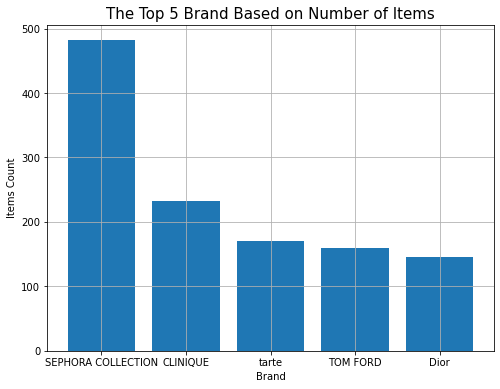

In [33]:
## Creating the bar plot

x = final_items['brand'].unique().tolist()
y = final_items['result']


plt.figure(figsize=(8,6))
plt.bar(x, y)
plt.title('The Top 5 Brand Based on Number of Items', size=15)
plt.xlabel('Brand')
plt.ylabel('Items Count')
plt.grid()
plt.show()

## 5. Siapa brand yang paling banyak disukai ? urutkan top 5 ?

In [42]:
love = df[['brand','love']].groupby(['brand'], as_index=False).sum()
love = love.sort_values(by=['love'], ascending=False)
love = love[love['love']>4800000]
love.head()

,brand,love
232,SEPHORA COLLECTION,8821492
8,Anastasia Beverly Hills,5990600
322,tarte,5660110
90,FENTY BEAUTY by Rihanna,5613710
279,Urban Decay,4847647


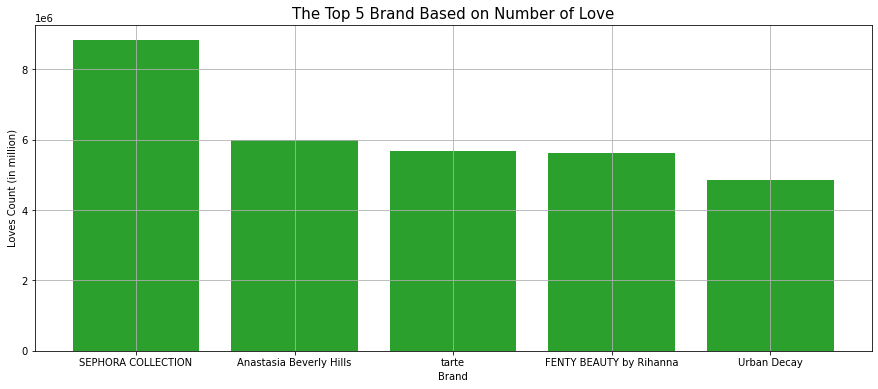

In [50]:
## Creating the bar plot

x = love['brand'].unique().tolist()
y = love['love']

plt.figure(figsize=(15,6))
plt.bar(x, y, color='tab:green')
plt.title('The Top 5 Brand Based on Number of Love', size=15)
plt.xlabel('Brand')
plt.ylabel('Loves Count (in million)')
plt.grid()
plt.show()

## 6. Kategori apa yang paling banyak menyumbang penjualan dari brand "tarte" ?

In [145]:
df_tarte = df[df['brand']=='tarte']
df_tarte.sample(2)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
7877,2094548,tarte,Concealer,Maracuja Creaseless Undereye Concealer,no size,3.0,1000,78100,26.0,26.0,...,False,0,no options,What it is: A vegan- full-coverage- creamy un...,Suggested Usage:-Use less than you think you n...,-Maracuja: Rich in essential fatty acids and v...,0,0,0,0
7919,1626969,tarte,Concealer,Colored Clay CC Undereye Corrector,0.08 oz/ 2.26 g,4.5,608,24700,25.0,25.0,...,False,0,no options,\nSkin type:✔ Normal✔ Dry✔ Combination ✔ Oily\...,Suggested Usage:-For a youthful-looking appear...,-Rose clay: Soothes skin around the eye area.\...,0,0,0,0


In [119]:
df_tarte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 7877 to 8046
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      170 non-null    int64  
 1   brand                   170 non-null    object 
 2   category                170 non-null    object 
 3   name                    170 non-null    object 
 4   size                    170 non-null    object 
 5   rating                  170 non-null    float64
 6   number_of_reviews       170 non-null    int64  
 7   love                    170 non-null    int64  
 8   price                   170 non-null    float64
 9   value_price             170 non-null    float64
 10  URL                     170 non-null    object 
 11  MarketingFlags          170 non-null    bool   
 12  MarketingFlags_content  170 non-null    object 
 13  options                 170 non-null    object 
 14  details                 170 non-null  

In [110]:
df_tarte.describe(include = np.object)

,brand,category,name,size,URL,MarketingFlags_content,options,details,how_to_use,ingredients
count,170,170,170,170,170,170,170,170,170,170
unique,1,49,170,65,170,7,1,164,152,146
top,tarte,Mascara,Tartelette™ In Bloom Clay Eyeshadow Palette,no size,https://www.sephora.com/product/tartelette-ama...,0,no options,What it is: A dual-ended eyeliner with a water...,no instructions,unknown
freq,170,13,1,89,1,92,170,2,5,17


In [146]:
df_tarte['count'] = 1
df_tarte.describe()

<ipython-input-146-9302001ef37a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tarte['count'] = 1


,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer,count
count,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0,170.0
mean,2.002967e+06,4.005882,471.941176,33294.764706,26.047059,28.370588,0.082353,0.294118,0.176471,0.0,1.0
std,3.163737e+05,0.650417,891.540716,49880.577814,14.357569,21.529071,0.275714,0.456991,0.382346,0.0,0.0
min,8.287720e+05,0.000000,0.000000,0.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,1.851052e+06,3.500000,18.000000,4025.000000,18.000000,19.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,2.094664e+06,4.000000,127.000000,14150.000000,24.000000,24.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,2.260002e+06,4.500000,679.000000,42350.000000,32.000000,33.750000,0.000000,1.000000,0.000000,0.0,1.0
max,2.343713e+06,5.000000,6000.000000,323300.000000,140.000000,184.000000,1.000000,1.000000,1.000000,0.0,1.0


In [147]:
df_tarte = df_tarte[['brand','category','count']]
df_tarte.describe(include=np.object)

,brand,category
count,170,170
unique,1,49
top,tarte,Mascara
freq,170,13


In [148]:
df_tarte = df_tarte[['category','count']].groupby(['category'], as_index=False).sum()


In [151]:
df_tarte = df_tarte.sort_values(by=['count'], ascending=False)
df_tarte = df_tarte[df_tarte['count']>7]
# df_tarte.sum(axis=0)

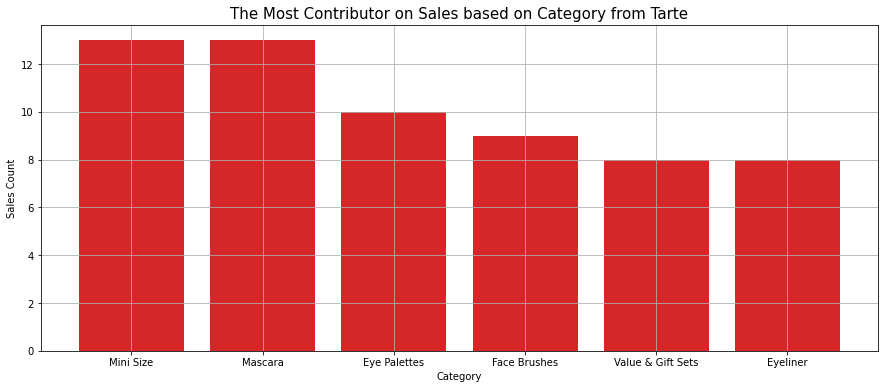

In [154]:
## Creating the bar plot

x = df_tarte['category'].unique().tolist()
y = df_tarte['count']

plt.figure(figsize=(15,6))
plt.bar(x, y, color='tab:red')
plt.title('The Most Contributor on Sales based on Category from Tarte', size=15)
plt.xlabel('Category')
plt.ylabel('Sales Count')
plt.grid()
plt.show()

## 7. Apakah ada hubungan antara harga dengan banyaknya produk yang terjual, dan banyaknya produk yang disukai ?

In [157]:
df.sample(3)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
7798,2219616,Supergoop!,Value & Gift Sets,"Supergoop! X Rebecca Taylor SPF, In Bloom Kit",no size,4.0,25,6000,25.0,25.0,...,False,0,no options,What it is: A refreshing set that helps hydra...,Suggested Usage:Superscreen Daily Moisturizer ...,Defense Refresh Setting Mist SPF 50:Avobenzone...,0,0,0,0
7828,1673557,surratt beauty,Eye Brushes,Artistique Concealer Brush Petite,no size,5.0,4,1200,45.0,45.0,...,False,0,no options,What it is:\n A small- natural-hair concealer ...,Suggested Usage:\n-To expertly cover blemishes...,unknown,0,0,0,0
7952,2139376,tarte,Value & Gift Sets,Girl Boss Goodies Skin & Makeup Mini Set,no size,4.5,44,17600,15.0,34.0,...,True,limited edition · exclusive,no options,What it is: A trio of nourishing- vegan beauty...,Suggested Usage: Drink of H2O Hydrating Boost ...,Drink of H2O Hydrating Boost Moisturizer Rainf...,0,1,1,0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   